### Dara Wrangling:
Data wrangling is the process of `cleaning` ,`Transforming` and ` organizing` so that can be used for ` analysis` and `visualization`. it is an important step in data analysis process because raw data is often incomplete, inconsistent and an unstructured format.data wrangling helps to make the dataconsistent , accurate and usefull for analysis and decision making.

### steps:
1. Gathering Data (kia)
2. Tools to clean data (kis se clean karna hay) libraries
3. how to do ,(kaisay karna hy) [steps]

In [94]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df=sns.load_dataset("titanic")

In [96]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [97]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [99]:
df.isnull().sum() / len(df) *100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [100]:
df.drop(columns="deck" ,inplace=True)

In [101]:
# replace the value with mean
df['age']=df.age.fillna(value=df['age'].mean())

In [102]:
# replace the value with median
df['embarked']=df.embarked.fillna(value=df['embarked'].mode()[0])


In [103]:
# replace the value with median
df['embark_town']=df.embark_town.fillna(value=df['embark_town'].mode()[0])

In [104]:
df.isnull().sum() / len(df) *100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

# Out Liers Removal

## Visualization wala methods:


<AxesSubplot: xlabel='sex', ylabel='age'>

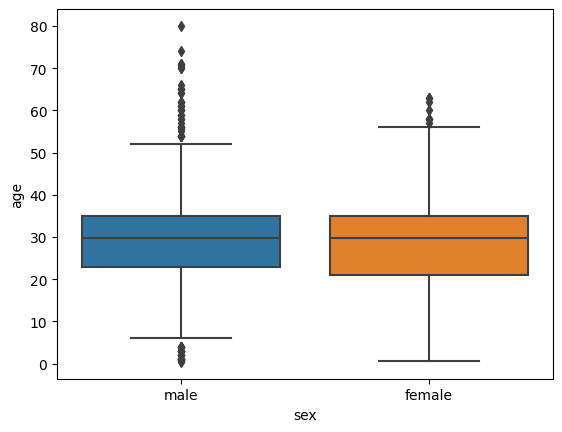

In [105]:
import seaborn as sns
sns.boxplot(data=df ,y='age' ,x='sex')

## IQR method (Inter quartile Range Methods)

In [106]:
# IQR methods
Q1 =df['age'].quantile(0.25)
Q3 =df['age'].quantile(0.75)
IQR = Q3-Q1
IQR
lower_bound =Q1-1.5 *IQR
upper_bound =Q3 +1.5*IQR
df=df[(df['age']> lower_bound) & (df['age'] < upper_bound)]

In [107]:
df.shape

(825, 14)

# Z Core Methods

In [108]:
# Zscore methods
#pip install scipy
# from scipy import stats
# import numpy as np
# zscore=np.abs(stats.zscore(df['age']))
# threshold=3
# df=df[(z<threshold).all(axis=1)]

# finding and dropping duplicates

In [109]:

df.shape

(825, 14)

In [110]:
# finding duplicates
df.duplicated().sum()

109

In [111]:
df_duplicates =df[df.duplicated()]
df_duplicates.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [112]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [113]:
df.shape

(716, 14)

# Data Normalization

In [134]:
# 1 .import libraries
# pip install scikit-learn
import pandas as pd
from sklearn .preprocessing import MinMaxScaler

# 2. data
df

# 3. select columns to normalize
cols_to_normalize=['age' ,'fare']

#4. create the scaler functions or tools
scaler=MinMaxScaler()

#5. fit and transform the data on scaler or vice versa
df[cols_to_normalize] =scaler.fit_transform(df[cols_to_normalize])

#6 .check the data
df

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,1,0,0.014151,S,Third,man,True,Southampton,no,False,2
1,1,1,female,0.686275,1,0,0.139136,C,First,woman,False,Cherbourg,yes,False,2
2,1,3,female,0.450980,0,0,0.015469,S,Third,woman,False,Southampton,yes,True,1
3,1,1,female,0.627451,1,0,0.103644,S,First,woman,False,Southampton,yes,False,2
4,0,3,male,0.627451,0,0,0.015713,S,Third,man,True,Southampton,no,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.705882,0,5,0.056848,Q,Third,woman,False,Queenstown,no,False,6
887,1,1,female,0.313725,0,0,0.058556,S,First,woman,False,Southampton,yes,True,1
888,0,3,female,0.523512,1,2,0.045771,S,Third,woman,False,Southampton,no,False,4
889,1,1,male,0.450980,0,0,0.058556,C,First,man,True,Cherbourg,yes,True,1


In [115]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,0.412011,2.277933,0.507194,0.509777,0.393855,0.066769
std,0.492541,0.845962,0.211678,0.961447,0.833673,0.102962
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.372549,0.000000,0.000000,0.015469
50%,0.000000,3.000000,0.523512,0.000000,0.000000,0.030254
75%,1.000000,3.000000,0.627451,1.000000,0.000000,0.061807
max,1.000000,3.000000,1.000000,8.000000,6.000000,1.000000


In [116]:
# 1 .import libraries
# pip install scikit-learn
import pandas as pd
from sklearn .preprocessing import StandardScaler

# 2. data
df

# 3. select columns to normalize
cols_to_normalize=['age' ,'fare']

#4. create the scaler functions or tools
scaler=StandardScaler()

#5. fit and transform the data on scaler or vice versa
df[cols_to_normalize] =scaler.fit_transform(df[cols_to_normalize])

#6 .check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.636531,1,0,-0.511396,S,Third,man,True,Southampton,no,False
1,1,1,female,0.846595,1,0,0.703347,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,-0.265749,0,0,-0.498591,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.568509,1,0,0.358401,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.568509,0,0,-0.496220,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.939290,0,5,-0.096417,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.914617,0,0,-0.079818,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.077142,1,2,-0.204074,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.265749,0,0,-0.079818,C,First,man,True,Cherbourg,yes,True


In [117]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,716.000000,716.000000,7.160000e+02,716.000000,716.000000,7.160000e+02
mean,0.412011,2.277933,3.572561e-16,0.509777,0.393855,7.318789e-17
std,0.492541,0.845962,1.000699e+00,0.961447,0.833673,1.000699e+00
min,0.000000,1.000000,-2.397743e+00,0.000000,0.000000,-6.489325e-01
25%,0.000000,1.000000,-6.365308e-01,0.000000,0.000000,-4.985913e-01
50%,0.000000,3.000000,7.714171e-02,0.000000,0.000000,-3.548898e-01
75%,1.000000,3.000000,5.685090e-01,1.000000,0.000000,-4.821997e-02
max,1.000000,3.000000,2.329721e+00,8.000000,6.000000,9.070205e+00


## log transformations

In [118]:
kashti= sns.load_dataset("titanic")
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [119]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [120]:
import numpy as np
kashti['age'] =kashti['age'].fillna(kashti['age'].median())
kashti['fare'] =kashti['fare'].fillna(kashti['fare'].median())

#log transform
kashti['age'] =np.log(kashti["age"])
kashti['fare'] =np.log(kashti["fare"])
kashti.head()

c:\Users\Afaq khalid\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot: xlabel='sex', ylabel='fare'>

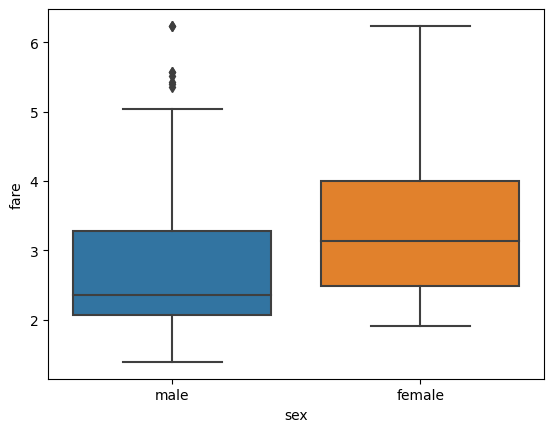

In [121]:
sns.boxplot(data=kashti ,x='sex' ,y='fare')

<AxesSubplot: xlabel='age', ylabel='Count'>

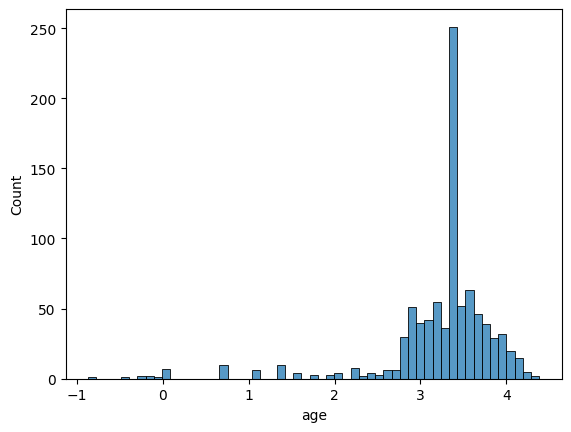

In [122]:
sns.histplot(kashti['age'])

In [126]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

# Organizing the data

In [130]:
# add columns
df['family_size'] = df['sibsp'] +df['parch'] +1


c:\Users\Afaq khalid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='sex', ylabel='age'>

c:\Users\Afaq khalid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afaq khalid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afaq khalid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Afaq khalid\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use strippl

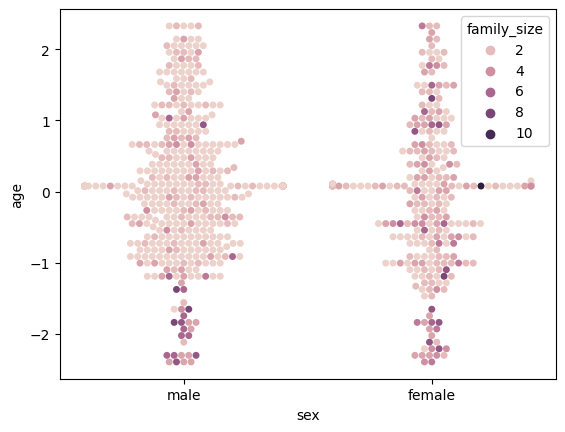

In [132]:
sns.swarmplot(data=df ,x='sex' ,y='age' ,hue='family_size')

In [133]:
df=df.rename(columns={'survived':'survival'})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [135]:
df['family_size'] = df['sibsp'] +df['parch']

In [136]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,1,0,0.014151,S,Third,man,True,Southampton,no,False,1
1,1,1,female,0.686275,1,0,0.139136,C,First,woman,False,Cherbourg,yes,False,1
2,1,3,female,0.450980,0,0,0.015469,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.627451,1,0,0.103644,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.627451,0,0,0.015713,S,Third,man,True,Southampton,no,True,0


## Saving the Wrangled data

In [137]:
df.to_csv("preprocessed_data.csv")